In [3]:
import numpy as np
import math
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

import pandas as pd
import pandas_datareader as web

In [4]:
# Get and encode data
df = web.DataReader('6888.KL', data_source='yahoo', start='2011-05-12',end='2020-05-12')
df.to_csv('stock5.csv')
df = pd.read_csv('stock5.csv')

In [5]:
# Set date as index
df = df.set_index('Date')

# Analysis 

In [40]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,New
Date,,,,,,,
2020-03-06,4.07,3.98,4.07,4.00,5792100.0,4.00,0.07
2020-03-09,4.03,3.90,3.97,3.98,4610400.0,3.98,-0.01
2020-03-10,4.06,3.94,3.94,3.99,9702500.0,3.99,-0.05
2020-03-11,4.02,3.94,3.99,3.96,8149700.0,3.96,0.03
2020-03-12,3.96,3.93,3.95,3.94,6903700.0,3.94,0.01


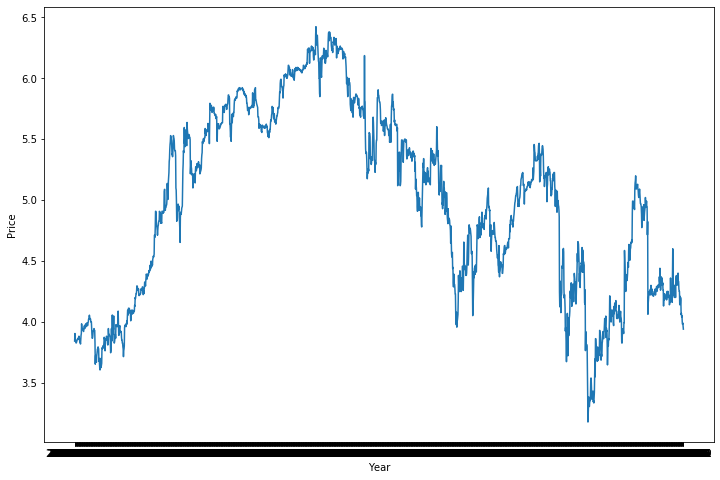

In [110]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Plotting the data
plt.figure(figsize = (12,8))
plt.plot(df['Adj Close'])
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

In [87]:
# Highest changes in stock price
df['New']=df['Open']-df['Close']
print('Highest increase: MYR' + str(round(max(df['New']),2)) + ' on ' + df['New'].idxmax(axis = 1, skipna = True))
print('Highest decrease: MYR' + str(round(min(df['New']),2)) + ' on ' + df['New'].idxmin(axis = 1, skipna = True))

Highest increase: MYR0.58 on 2018-10-10
Highest decrease: MYR-0.51 on 2015-08-03


In [92]:
# Max and min stock price
print('Max: MYR' + str(round(max(df['Close']),2)))
print('Min: MYR' + str(round(min(df['Close']),2)))

Max: MYR7.27
Min: MYR3.25


In [70]:
# Moving average of stock price
df['Adj Close'].sum() / len(df['Adj Close'])

4.982912101715025

# Train

In [12]:
# Creating the dataset for the model, extract only the needed variable from original dataset
df2=[]
df2 = df[['Adj Close']]

print(df2.head())

            Adj Close
Date                 
2011-05-12   3.842375
2011-05-13   3.904225
2011-05-16   3.857837
2011-05-18   3.842375
2011-05-19   3.850106


In [95]:
# Generate new column for prediction (price 30 entries ahead)
forecast_out = 30
df2['Prediction'] = df2[['Adj Close']].shift(-forecast_out)

print(df2.head())

            Adj Close  Prediction
Date                             
2011-05-12   3.842375    3.936249
2011-05-13   3.904225    3.928361
2011-05-16   3.857837    3.920472
2011-05-18   3.842375    3.944138
2011-05-19   3.850106    3.952026


C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [99]:
# Setting close as X
X = np.array(df2.drop(['Prediction'], 1))

# Reserving 60 data for testing
X_new = X[0:2123]

In [100]:
# Setting prediction as y
y = np.array(df2['Prediction'])

# Reserving 60 data for testing
y_new = y[:-60]

In [19]:
# Splitting data in test and train in 80/20
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2)

In [102]:
# Setting y as prediction, reserving last 30 for forecasting out
y = np.array(df2['Prediction'])
y = y[:-forecast_out]
print(y)
len(y)

[3.93624878 3.9283607  3.92047215 ... 3.99000001 3.96000004 3.94000006]


2153

## Validation

In [21]:
# Training linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# Predicting the last 30 days with the model 
y_pre = lr.predict(X[2153:2183])
print("Predicted last 30 days")
print(y_pre)

Predicted last 30 days
[4.37214592 4.28156603 4.41743544 4.43555133 4.44460949 4.41743544
 4.37214592 4.43555133 4.4264936  4.44460949 4.46272538 4.39931955
 4.39931955 4.34497187 4.32685598 4.32685598 4.22721836 4.29062419
 4.23627652 4.28156603 4.26345014 4.15475479 4.16381295 4.1366389
 4.14569706 4.10040711 4.08229122 4.09134917 4.06417533 4.04605944]


In [23]:
# Calculating confidence score
confidence = lr.score(X_test, y_test)
print("Confidence Score: ", confidence)

Confidence Score:  0.849966092481015


In [103]:
# Actual data of last 30 days
x_forecast = np.array(df2.drop(['Prediction'], 1))[-forecast_out:]

Text(0, 0.5, 'Price')

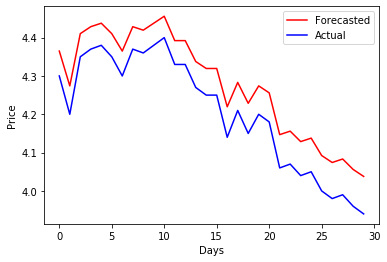

In [104]:
# PLotting the predicted values with the actual values
plt.plot(y_pre, color='r')
plt.plot(x_forecast, color='b')
plt.legend(['Forecasted', 'Actual'])
plt.xlabel("Days")
plt.ylabel("Price")

In [26]:
# Calculate mse score
print("Mean Squared Error: ", mean_squared_error(y_pre, x_forecast))

Mean Squared Error:  0.006762122421861641


### Prediction

In [107]:
# Repeat the prediction with the model 11 times
y_pre2 = [] 
y_pre2.append(np.array(y_pre))
for x in range(11):
    y_pre_alt = y_pre2[x]
    y_pre_in = lr.predict(y_pre_alt.reshape(-1, 1))
    y_pre2.append(np.array(y_pre_in))

In [105]:
# Combine the predicted data into one list
forward = []
for x in y_pre2:
    for y in x:
        forward.append(y)

In [108]:
# Append the predicted data to previous data (for plotting comparison)
xxx = np.append(X[1889:], forward)

Text(0, 0.5, 'Price')

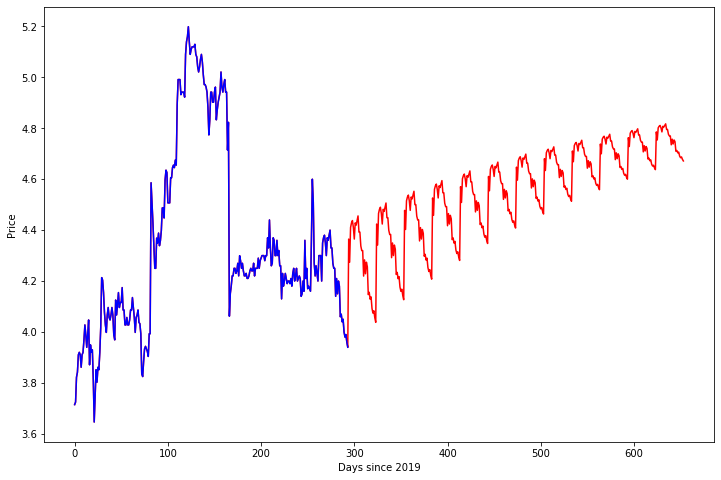

In [109]:
#The stock prices predicted from 1 day into the future, to a year into the future
plt.figure(figsize = (12,8))
plt.plot(xxx, color='r')
plt.plot(X[1889:], color='b')
plt.xlabel("Days since 2019")
plt.ylabel("Price")